# NER (Named Entity Recognition) Görevi
## Etiketler ve Anlamları:


*   ANAT: Anatomik kısım, lokalizasyon, histolojik antite, anatomik dağılım ifadeleri, taraf bulgusu.

* OBS-PRESENT: Radyolojik bir özelliğin varlığı, tanımlanabilir patofizyolojik süreç veya tanısal hastalık olma durumu.

* OBS-ABSENT: Radyolojik bir özelliğin bulunmaması, tanımlanabilir patofizyolojik süreç veya tanısal hastalık olmama durumu.

* OBS-UNCERTAIN: Şüphe var ama bir konuda kesinlik yok, belirsizlik içeren bir bulgu, ayırıcı tanı, belirsiz net olmayan patofizyolojik süreç veya teşhis hastalık.

## Hazırlık ve Etiketleme Stratejileri
### Veri Ön İşleme:

* Raporlardaki yazım hatalarını düzeltin veya bunları dikkate alacak şekilde modelinizi eğitin.

* Teknik çekim önerileri ve etiketleme kapsamı dışındaki ifadeleri filtreleyin.
Doğal Dil İşleme (NLP) Teknikleri:

* Tokenizasyon: Metni kelime veya cümle bazında parçalara ayırın.
Lemmatizasyon ve Durak Kelime Çıkarma: Kelimelerin kök hallerini bulun ve anlam taşımayan kelimeleri çıkarın.

* Özellik Çıkarımı: TF-IDF, Word2Vec veya BERT gibi ileri düzey vektörleştirme tekniklerini kullanarak metni sayısal verilere dönüştürün.

### Model Eğitimi:

* Eğitim verisi olarak 1028 raporun etiketlenmiş JSON verilerini kullanın.
* CRF (Conditional Random Fields), LSTM (Long Short-Term Memory) veya BERT gibi NER modelleri ile eğitin.
* Çapraz doğrulama (cross-validation) ile model performansını değerlendirin.

### Etiketleme Süreci:

* Raporlarda belirlenen ifadeleri ANAT, OBS-PRESENT, OBS-ABSENT ve OBS-UNCERTAIN etiketleri ile işaretleyin.
* Etiketleme sırasında belirli kurallara ve örüntülere dikkat ederek doğru sınıflandırma yapın.

## Belirsizlik Yönetimi:

* OBS-UNCERTAIN etiketi için belirsiz ifadeleri tanımlayacak özel algoritmalar geliştirin.
* Belirsizlik içeren ifadelerin doğru tespit edilmesi için modelinizi eğitin.
İpuçları ve Öneriler
* Düzenli İfadeler (Regex): Belirli kalıpları tespit etmek ve etiketleme sürecini kolaylaştırmak için düzenli ifadeler kullanın.
* Yanlış Etiketlemeleri Analiz Etme: Modelinizin yanlış etiketlemelerini analiz ederek doğruluğunu artırın.
* Geri Bildirim Döngüsü: Modelin tahminlerini sürekli olarak geri bildirimle iyileştirin.

## Başarı İçin Stratejiler
* Raporlardaki varyasyonları dikkate alarak modelinizin esnekliğini artırın.
* Eğitim verilerinizdeki tüm varyasyonları analiz edin ve modelinizin bu varyasyonları tanıyabilmesini sağlayın.
* Belirsizlik içeren ifadeleri doğru tanımlamak için özel algoritmalar geliştirin ve modelinizin belirsizliği ayırt edebilmesini sağlayın.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# veri yükleme ve format düzenleme adımı

In [4]:
# veri setlerinin çağrılması

import pandas as pd

json_files = [
    '/path/to/json/dataset/name.jsonl',
    '/path/to/json/dataset/name.jsonl',
    '/path/to/json/dataset/name.jsonl',
    '/path/to/json/dataset/name.jsonl'
]

dataframes = [pd.read_json(file, lines=True) for file in json_files]
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df


,id,text,label,Comments
0,284,BİLATERAL MAMOGRAFİ İNCELEMESİ:\nHer iki memen...,"[[32, 47, ANAT], [48, 59, ANAT], [60, 66, OBS-...",[]
1,285,BİLATERAL MAMOGRAFİ İNCELEMESİNDE; \nBilateral...,"[[36, 50, ANAT], [51, 65, ANAT], [66, 75, OBS-...",[]
2,286,BİLATERAL MAMOGRAFİ İNCELEMESİ\nBilateral meme...,"[[31, 45, ANAT], [46, 60, ANAT], [61, 71, OBS-...",[]
3,287,BİLATERAL MAMOGRAFİ İNCELEMESİ\nHer iki memede...,"[[31, 45, ANAT], [46, 70, ANAT], [71, 78, ANAT...",[]
4,288,BİLATERAL MAMOGRAFİ İNCELEMESİ:\nHer iki meme ...,"[[32, 44, ANAT], [45, 59, ANAT], [60, 65, OBS-...",[]
...,...,...,...,...
1023,2043,Unilateral Mammografi incelemesinde;\nSağ meme...,"[[37, 45, ANAT], [45, 55, ANAT], [56, 61, OBS-...",[]
1024,2044,UNİLATERAL MAMOGRAFİ İNCELEMESİ\nSağ meme cilt...,"[[32, 40, ANAT], [41, 55, ANAT], [56, 65, OBS-...",[]
1025,2045,UNİLATERAL MAMOGRAFİ İNCELEMESİ\nSağ meme cild...,"[[32, 40, ANAT], [41, 46, ANAT], [47, 54, OBS-...",[]
1026,2046,UNİLATERAL MAMOGRAFİ İNCELEMESİ\nSol meme cilt...,"[[32, 40, ANAT], [41, 55, ANAT], [56, 62, OBS-...",[]


In [5]:
# BIO Formatı ve Kullanımı:
# BIO formatı, doğal dil işleme görevlerinde sıklıkla kullanılan bir etiketleme şemasıdır, özellikle de Named Entity Recognition (NER) gibi görevlerde.
# BIO, "Başlangıç" (Beginning), "İç" (Inside) ve "Dış" (Outside) anlamlarına gelir.
# Bir kelimenin etiketi "B-" ile başlıyorsa, bu kelime bir varlığın başlangıcıdır.
# Ardından, aynı varlığın bir parçası olan diğer kelimeler "I-" ile etiketlenir.
# Diğer tüm kelimeler "O" (Dış) ile etiketlenir ve bir varlığın parçası değildir.

import pandas as pd

def etiketle_metin_bio(metin, etiketler, sentence_id):
    kelime_kolonu = metin.split()
    label_kolonu = ['O'] * len(kelime_kolonu)

    # 'etiketler' listesini 'metin' içindeki kelimelerle uyumlu hale getir
    for bas, son, etiket_adi in etiketler:
        kelime_araligi = metin[bas:son].split()
        for i, kelime in enumerate(kelime_kolonu):
            if kelime in kelime_araligi:
                if len(kelime_araligi) == 1:
                    label_kolonu[i] = 'B-'+etiket_adi
                else:
                    if kelime == kelime_araligi[0]:
                        label_kolonu[i] = 'B-'+etiket_adi
                    else:
                        label_kolonu[i] = 'I-'+etiket_adi

    # Kelimelerin cümle ve kelime kimliği eşleştirme işlemi
    word_id = list(range(1, len(kelime_kolonu) + 1))
    sentence_id_list = [sentence_id] * len(kelime_kolonu)

    return pd.DataFrame({'sentence_id': sentence_id_list, 'word_id': word_id, 'word': kelime_kolonu, 'label': label_kolonu})

# Tüm veri setine uygula
etiketlenmis_veri = []
for i in range(len(combined_df)):
    metin = combined_df.text[i]
    etiketler = combined_df.label[i]
    sentence_id = i + 1  # Her bir veri noktası için bir cümle kimliği oluşturulur
    etiketli_df = etiketle_metin_bio(metin, etiketler, sentence_id)
    etiketlenmis_veri.append(etiketli_df)

# Sonuçları birleştir
data = pd.concat(etiketlenmis_veri, ignore_index=True)
data


,sentence_id,word_id,word,label
0,1,1,BİLATERAL,O
1,1,2,MAMOGRAFİ,O
2,1,3,İNCELEMESİ:,O
3,1,4,Her,B-ANAT
4,1,5,iki,I-ANAT
...,...,...,...,...
70588,1028,43,veya,O
70589,1028,44,kitle,B-OBS-ABSENT
70590,1028,45,saptanmamıştır.,O
70591,1028,46,SONUÇ:BIRADS,O


# Etiketli veri görselleştirmesi


In [6]:
import pandas as pd
import spacy
from spacy.tokens import Doc, Span
from spacy import displacy

# SpaCy modelini yükle
nlp = spacy.load("en_core_web_sm")



# Kelimeleri ve etiketleri listeye çevir
words = data['word'].tolist()[:25]
labels = data['label'].tolist()[:25]

# SpaCy dokümanını oluştur
doc = Doc(nlp.vocab, words=words)

# Etiketleri SpaCy spanlarına dönüştür
spans = []
for i, label in enumerate(labels):
    if label != "O":
        label_type = label
        spans.append(Span(doc, i, i+1, label=label_type))


# SpaCy dokümanına spanları ekle
doc.ents = spans

# Renk paleti tanımla
colors = {
    "B-ANAT": "lightblue",
    "I-ANAT": "lightblue",
    "L-ANAT": "lightblue",

    "B-OBS-PRESENT": "lightgreen",
    "I-OBS-PRESENT": "lightgreen",
    "L-OBS-PRESENT": "lightgreen",

    "B-OBS-ABSENT": "lightcoral",
    "I-OBS-ABSENT": "lightcoral",
    "L-OBS-ABSENT": "lightcoral",

    "B-OBS-UNCERTAIN": "lightyellow",
    "I-OBS-UNCERTAIN": "lightyellow",
    "L-OBS-UNCERTAIN": "lightyellow",
    "B-IMPRESSION": "lightpink",
    "I-IMPRESSION": "lightpink",
    "L-IMPRESSION": "lightpink",
    "O": "white"
}

# Görselleştirme seçeneklerini belirle
options = {"ents": [ 'B-ANAT', 'I-ANAT', 'B-OBS-PRESENT', 'B-OBS-ABSENT',
       'I-OBS-PRESENT', 'I-OBS-ABSENT', 'I-IMPRESSION',
       'L-OBS-ABSENT', 'B-IMPRESSION',  'L-ANAT',
       'I-OBS-UNCERTAIN', 'L-OBS-PRESENT', 'L-OBS-UNCERTAIN',
       'B-OBS-UNCERTAIN',"O"] , "colors": colors}

# Görselleştirme
displacy.render(doc, style="ent", options=options, jupyter=True)

# Veri ön işleme

## Veri ön işleme 1 (Rapordaki istenilmeyen verilerin çıkarılması )



*   “Impression” etiketi aslında o raporun BIRADS skorudur. Raporlar içerisinde farklı yazım şekilleri olduğu dikkati çekecektir. Yarışma anında size verilecek metinde sonuç kısmı olmayacaktır. Dolayısıyla impression etiketi NER görevinde kullanılmayacaktır. [Verilen belgede geçen ifade ]



In [7]:

# 'IMPRESSION' ile bitmeyen satırların indekslerini al
indexes_to_update = data[data['label'].str.endswith('IMPRESSION')].index

# Bu indekslerde 'label' sütunundaki değerleri 'O' ile değiştir
data.loc[indexes_to_update, 'label'] = 'O'

# Bu indekslerde 'word' sütunundaki değerleri 'xxx' ile değiştir
data.loc[indexes_to_update, 'word'] = 'xxx'


data.word = data.word.str.lower()
data

,sentence_id,word_id,word,label
0,1,1,bi̇lateral,O
1,1,2,mamografi̇,O
2,1,3,i̇ncelemesi̇:,O
3,1,4,her,B-ANAT
4,1,5,iki,I-ANAT
...,...,...,...,...
70588,1028,43,veya,O
70589,1028,44,kitle,B-OBS-ABSENT
70590,1028,45,saptanmamıştır.,O
70591,1028,46,sonuç:birads,O


In [8]:
# Bu fonksiyon, raporda geçtiği tespit edilen bazı noktalama işaretlerini kaldırmak için oluşturulmuştur.
# Noktalama işaretleri boşluklarla değiştirilir.
# üst tırnak veya kesme işareti silinmedi kelime bozulmasın diye (ör: Ali'ye ) ama gerekli görülürse çıkarılıabilir .

import re

# Noktalama işaretlerini boşluklarla değiştirmek için bir fonksiyon tanımlayın
def replace_punctuation_with_space(text):
    # Noktalama işaretlerini eşleştirmek için düzenli ifade deseni tanımlayın
    punctuation_pattern = r'[,;:.–()~/+"*?%-]'
    # Noktalama işaretlerini boşluklarla değiştirin
    text_without_punctuation = re.sub(punctuation_pattern, ' ', text)
    return text_without_punctuation

# Fonksiyonu "word" sütununa uygulayın
data['word'] = data['word'].apply(replace_punctuation_with_space)
data.word = data.word.str.lower()

# Sadece noktalama işaretleri içeren word kolonları boşta kalmışsa silinir .
#  data = data[data['word'].str.strip() != '']

data['word'].fillna('xxx', inplace=True)

data

<ipython-input-8-2d6ce0f03138>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['word'].fillna('xxx', inplace=True)


,sentence_id,word_id,word,label
0,1,1,bi̇lateral,O
1,1,2,mamografi̇,O
2,1,3,i̇ncelemesi̇,O
3,1,4,her,B-ANAT
4,1,5,iki,I-ANAT
...,...,...,...,...
70588,1028,43,veya,O
70589,1028,44,kitle,B-OBS-ABSENT
70590,1028,45,saptanmamıştır,O
70591,1028,46,sonuç birads,O


In [9]:
# Bu fonksiyon, çoğu belgede geçen ve metin başlık ifadesi olan "BİLATERAL/ARATERAL MAMOGRAFİ İNCELEMESİ" gibi ifadeleri silmek için oluşturulmuştur.
# İlk üç kelime "BİLATERAL/ARATERAL MAMOGRAFİ İNCELEMESİ" olan cümlelerin indekslerini bulur ve bu indekslere sahip verileri filtreler.
# Sonuç olarak, veri çerçevesindeki bu cümlelerin başlangıç kısımlarındaki gereksiz kelimeleri siler.


def replace_words_with_xxx(data):
    # 'teral' kelimesini içeren word_id = 0 olan sentence_id'leri bulma
    teral_sentence_ids = set(data[(data['word'].str.contains('teral', case=False)) & (data['word_id'] == 1)]['sentence_id'])

    # 'mamografi̇' kelimesini içeren word_id = 1 olan sentence_id'leri bulma
    mamografi_sentence_ids = set(data[(data['word'].str.contains('ograf', case=False)) & (data['word_id'] == 2)]['sentence_id'])

    # 'nceleme' kelimesini içeren word_id = 2 olan sentence_id'leri bulma
    nceleme_sentence_ids = set(data[(data['word'].str.contains('nceleme', case=False)) & (data['word_id'] == 3)]['sentence_id'])

    # Üç koşulu sağlayan sentence_id'leri bulma
    desired_sentence_ids = teral_sentence_ids.intersection(mamografi_sentence_ids, nceleme_sentence_ids)

    # Belirtilen sentence_id'lerine sahip verileri filtreleme
    desired_data = data[data['sentence_id'].isin(desired_sentence_ids)]

    # Verilerin indekslerini bulma
    indexes_to_replace = desired_data.groupby('sentence_id').head(3).index

    # 'xxx' ile değiştirme
    data.loc[indexes_to_replace, 'word'] = 'xxx'

    return data

data = replace_words_with_xxx(data)

data




,sentence_id,word_id,word,label
0,1,1,xxx,O
1,1,2,xxx,O
2,1,3,xxx,O
3,1,4,her,B-ANAT
4,1,5,iki,I-ANAT
...,...,...,...,...
70588,1028,43,veya,O
70589,1028,44,kitle,B-OBS-ABSENT
70590,1028,45,saptanmamıştır,O
70591,1028,46,sonuç birads,O


In [11]:
import pandas as pd
import re

def clean_data(data):
    # 'sentence_id' gruplandırması yapma ve her grubun son 3 satırını alarak yeni bir DataFrame oluşturma
    grouped_data = data.groupby('sentence_id').tail(3)

    # Bir değerin 'sonu' kelimesini içerip içermediğini (isteğe bağlı başlangıç/sondaki boşluklarla) kontrol eden bir işlev
    def contains_sonu(value):
        return bool(re.search(r'\s*sonu\s*', value))

    # Bir değerin 'rad' kelimesini içerip içermediğini (isteğe bağlı başlangıç/sondaki boşluklarla) kontrol eden bir işlev
    def contains_bira(value):
        return bool(re.search(r'\s*rad\s*', value))

    # Bir değerin sayısal olup olmadığını kontrol eden bir işlev
    def is_numeric(value):
        try:
            float(value)
            return True
        except ValueError:
            return False

    # Koşulları uygulayarak boolean maskeler oluşturma
    sonu_mask = grouped_data['word'].apply(contains_sonu)
    bira_mask = grouped_data['word'].apply(contains_bira)
    numeric_mask = grouped_data['word'].apply(is_numeric)

    # Maskeleri birleştirerek kaldırılacak satırları bulma
    combined_mask = sonu_mask | bira_mask | numeric_mask

    # Herhangi bir koşulu sağlayan satırları filtreleme
    filtered_data = grouped_data[combined_mask]

    # Orijinal veri kümesinin bir kopyasını oluşturma
    cleaned_data = data.copy()

    # Temizlenmiş veri kümesindeki belirli satırlardaki 'word' sütununu "xxx" ile değiştirme
    cleaned_data.loc[filtered_data.index, 'word'] = 'xxx'

    # Temizlenmiş veri kümesindeki belirli satırlardaki 'label' sütununu "O" ile değiştirme
    cleaned_data.loc[filtered_data.index, 'label'] = 'O'

    return cleaned_data

clean_data(data)


,sentence_id,word_id,word,label
0,1,1,xxx,O
1,1,2,xxx,O
2,1,3,xxx,O
3,1,4,her,B-ANAT
4,1,5,iki,I-ANAT
...,...,...,...,...
70588,1028,43,veya,O
70589,1028,44,kitle,B-OBS-ABSENT
70590,1028,45,saptanmamıştır,O
70591,1028,46,xxx,O


# Veri Ön işleme 2 (Kelime bazlı ön işleme süresi)

In [13]:
!pip install JPype1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 8.1 MB/s eta 0:00:00


In [14]:
import jpype as jp
import string
from jpype import JClass, getDefaultJVMPath, startJVM, JString

# JVM başlatma
ZEMBEREK_PATH = r'/path/to/zemberek-full.jar'
if not jp.isJVMStarted():
    startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))

# Zemberek bileşenlerini tanımla
TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
TurkishSpellChecker = JClass('zemberek.normalization.TurkishSpellChecker')
TurkishSentenceNormalizer = JClass('zemberek.normalization.TurkishSentenceNormalizer')
Paths = JClass('java.nio.file.Paths')
TurkishTokenizer = JClass("zemberek.tokenization.TurkishTokenizer")

# Normalizasyon için dosya yolları
lookupRoot = Paths.get('/path/to/normalization')
lmPath = Paths.get('/path/to/lm.2gram.slm')
morphology = TurkishMorphology.createWithDefaults()
normalizer = TurkishSentenceNormalizer(morphology, lookupRoot, lmPath)
tokenizer = TurkishTokenizer.DEFAULT
spell_checker = TurkishSpellChecker(morphology)





In [15]:
def process_text(text):
    try:
        # 1. Yazım Denetimi ve Düzeltme
        if len(text) > 2:
            if not spell_checker.check(JString(text)):
                suggestions = spell_checker.suggestForWord(JString(text))
                if suggestions.size() > 0:
                    corrected_text = str(suggestions.get(0))  # İlk öneriyi al
                else:
                    corrected_text = text  # Eğer öneri yoksa orijinal kelimeyi kullan
            else:
                corrected_text = text
        else:
            corrected_text = text

        # 2. Normalization
        normalized_text = str(normalizer.normalize(JString(corrected_text)))

        # 3. Tokenization
        punctuation_free = "".join([i for i in normalized_text if i not in string.punctuation])
        tokens = [str(token) for token in tokenizer.tokenizeToStrings(JString(punctuation_free))]

        # 5. Lemmatization
        analysis_list = [morphology.analyzeAndDisambiguate(JString(word)).bestAnalysis()[0] for word in tokens]
        lemm_text = [str(analysis.getDictionaryItem().lemma) for analysis in analysis_list]

        # 6. Stemming
        stem_text = [str(analysis.getStem()) for analysis in analysis_list]

        return stem_text
    except Exception as e:
        print("An error occurred during text processing:", e)
        return None


# Kelime listesini işleyin
processed_word_list = []

for word in data.word:
    if word.strip():  # Kelime boş değilse işlem yap
        processed_word_list.append(process_text(word))
    else:
        processed_word_list.append("")  # Boş kelimeyi işlemeden direkt olarak listeye ekleyin



In [16]:
data["düzelmiş_word"] = processed_word_list
data["düzelmiş_word"] = data["düzelmiş_word"].apply(lambda x: x[0] if x else "")
data

,sentence_id,word_id,word,label,düzelmiş_word
0,1,1,xxx,O,xx
1,1,2,xxx,O,xx
2,1,3,xxx,O,xx
3,1,4,her,B-ANAT,her
4,1,5,iki,I-ANAT,iki
...,...,...,...,...,...
70588,1028,43,veya,O,veya
70589,1028,44,kitle,B-OBS-ABSENT,kitle
70590,1028,45,saptanmamıştır,O,sapta
70591,1028,46,sonuç birads,O,sonuç


In [17]:
data.loc[data['düzelmiş_word'] == '', 'düzelmiş_word'] = 'xx'




# veri görselleştirme

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70593 entries, 0 to 70592
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence_id    70593 non-null  int64 
 1   word_id        70593 non-null  int64 
 2   word           70593 non-null  object
 3   label          70593 non-null  object
 4   düzelmiş_word  70593 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


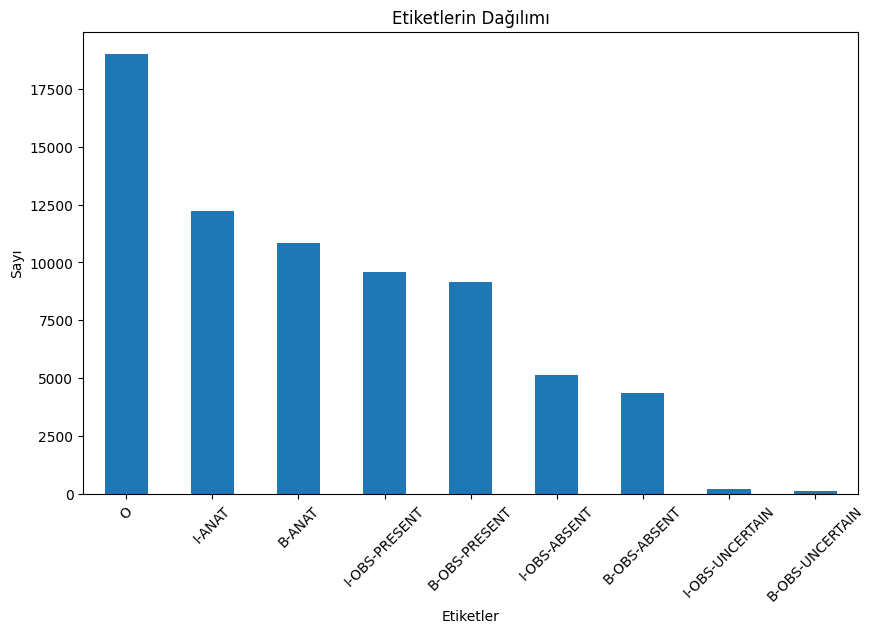

In [19]:
import matplotlib.pyplot as plt

# Etiketlerin dağılımını hesapla
label_counts = data.label.value_counts()

# Görselleştirme
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Etiketlerin Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()


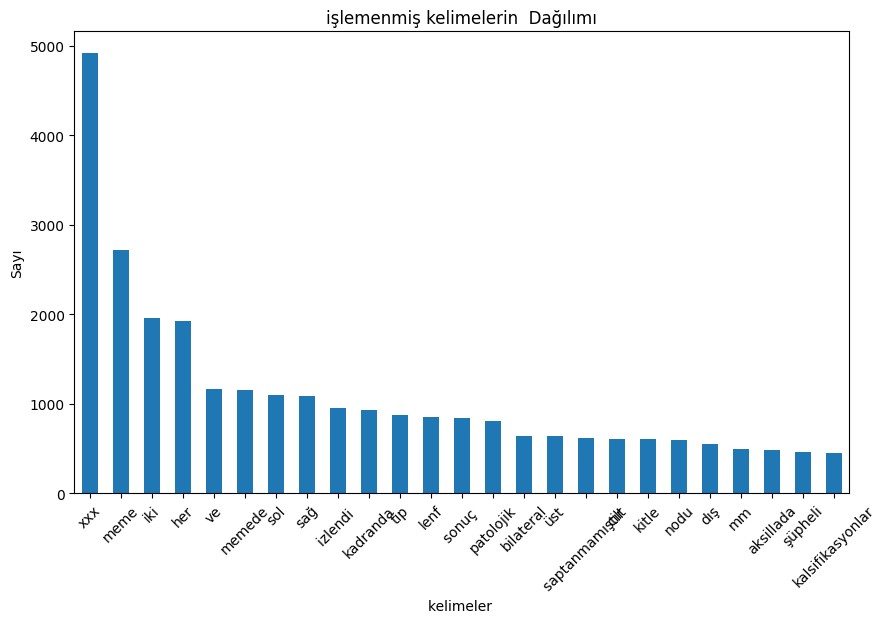

In [20]:
import matplotlib.pyplot as plt

# Etiketlerin dağılımını hesapla
word_counts = data.word.value_counts()[:25]

# Görselleştirme
plt.figure(figsize=(10, 6))
word_counts.plot(kind='bar')
plt.title('işlemenmiş kelimelerin  Dağılımı')
plt.xlabel('kelimeler ')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()


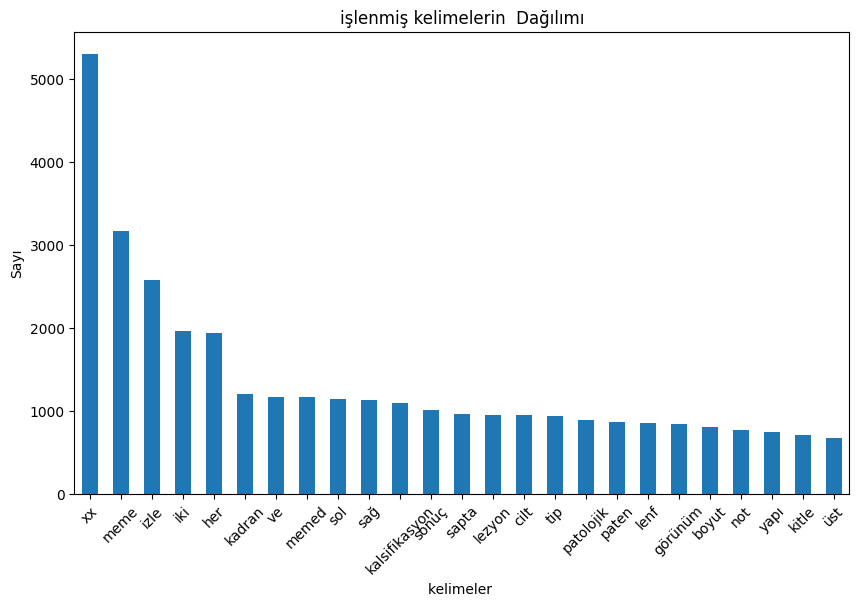

In [21]:
import matplotlib.pyplot as plt

# Etiketlerin dağılımını hesapla
word_counts = data.düzelmiş_word.value_counts()[:25]

# Görselleştirme
plt.figure(figsize=(10, 6))
word_counts.plot(kind='bar')
plt.title('işlenmiş kelimelerin  Dağılımı')
plt.xlabel('kelimeler ')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()


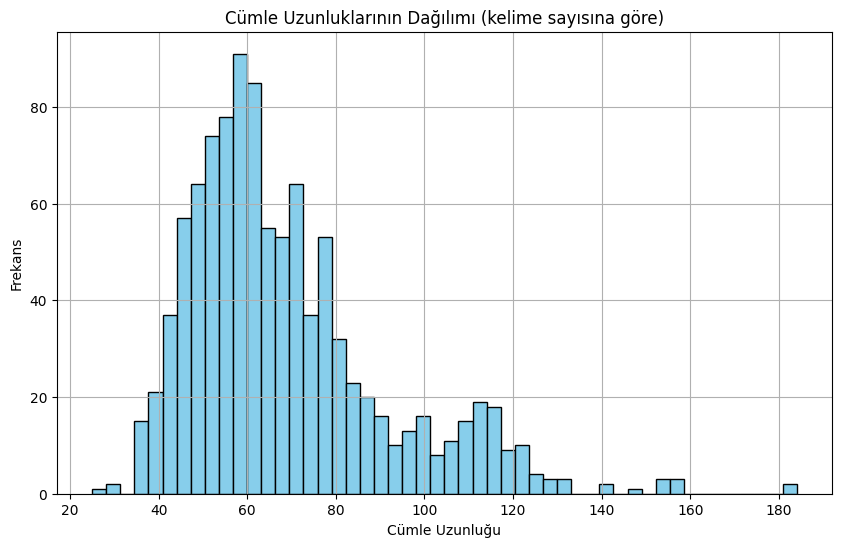

In [22]:
import matplotlib.pyplot as plt

# Cümle uzunluklarını hesapla
sentence_lengths = data.groupby('sentence_id')['word'].count()

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Cümle Uzunluklarının Dağılımı (kelime sayısına göre)')
plt.xlabel('Cümle Uzunluğu')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


In [23]:
data

,sentence_id,word_id,word,label,düzelmiş_word
0,1,1,xxx,O,xx
1,1,2,xxx,O,xx
2,1,3,xxx,O,xx
3,1,4,her,B-ANAT,her
4,1,5,iki,I-ANAT,iki
...,...,...,...,...,...
70588,1028,43,veya,O,veya
70589,1028,44,kitle,B-OBS-ABSENT,kitle
70590,1028,45,saptanmamıştır,O,sapta
70591,1028,46,sonuç birads,O,sonuç


# Eğitim hazırlık

In [24]:
data = data[["sentence_id","düzelmiş_word","label"]]
data


,sentence_id,düzelmiş_word,label
0,1,xx,O
1,1,xx,O
2,1,xx,O
3,1,her,B-ANAT
4,1,iki,I-ANAT
...,...,...,...
70588,1028,veya,O
70589,1028,kitle,B-OBS-ABSENT
70590,1028,sapta,O
70591,1028,sonuç,O


In [25]:
# Bu kod parçası, veri setinden cümleler oluştururken düzeltilmiş kelimeleri ve ilgili etiketleri eşleştirir.
# Daha sonra, her bir cümleyi bir liste içinde saklar.


words = data['düzelmiş_word'].tolist()
tags = data['label'].tolist()
sentences = []
for sentence_id, group in data.groupby('sentence_id'):
    sentence = [(word, tag) for word, tag in zip(group['düzelmiş_word'], group['label'])]
    sentences.append(sentence)


In [26]:
# Burada kelmeleri sayısallaştırmak için map oluşturuyoruz .
# bilinmeyen kelimeler "unk" , boş kelimeler "O" , her cümlenin eşit uzunlukta olmalarını sağlamak için ise "pad" kullanılacak .


word2idx = {word: i + 2 for i, word in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: word for word, i in word2idx.items()}

tag2idx = {tag: i + 1 for i, tag in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: tag for tag, i in tag2idx.items()}


In [27]:
# X için texti sayısallaştırıyoruz .
#Max_len ile her cümlede eşit sayıda kelime olması sağlanıyor .


from keras.preprocessing.sequence import pad_sequences

X = [[word2idx[word] for word, _ in sentence] for sentence in sentences]
MAX_LEN = max(len(words) for words in X)
X = pad_sequences(maxlen=MAX_LEN , sequences=X, padding="post", value=word2idx["PAD"])


In [28]:
# Y için labellların map i oluşturuluyor .

tag2idx = {tag: idx for idx, tag in enumerate(tag2idx.keys())}

tag2idx = {tag: idx for idx, (tag, _) in enumerate(tag2idx.items())}
tag2idx

{'O': 0,
 'B-ANAT': 1,
 'I-ANAT': 2,
 'B-OBS-PRESENT': 3,
 'B-OBS-ABSENT': 4,
 'I-OBS-PRESENT': 5,
 'I-OBS-ABSENT': 6,
 'I-OBS-UNCERTAIN': 7,
 'B-OBS-UNCERTAIN': 8,
 'PAD': 9}

In [29]:
from keras.utils import to_categorical

y = [[tag2idx[tag] for _, tag in sentence] for sentence in sentences]
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])
y = [to_categorical(i, num_classes=len(tag2idx)) for i in y]


In [30]:
import numpy as np

# Your data preparation code

# Convert y to numpy array
y = np.array(y)

# Print shapes
print("X:", X.shape)
print("y:", y.shape)
print("word2idx:", word2idx)
print("idx2word:", idx2word)
print("tag2idx:", tag2idx)
print("idx2tag:", idx2tag)


X: (1028, 184)
y: (1028, 184, 10)
word2idx: {'xx': 70594, 'her': 70213, 'iki': 70214, 'meme': 70572, 'cilt': 70496, 'yüzey': 53452, 'normal': 70498, 'ol': 70555, 'değer': 70449, 'kalın': 70497, 've': 70523, 'retraksiyon': 68820, 'sapta': 70592, 'liposkleroze': 63622, 'paten': 70559, 'izle': 70578, 'belirgin': 69819, 'ders': 70576, 'yapı': 70566, 'sol': 70560, 'memed': 70465, 'alt': 70562, 'dış': 70425, 'kadran': 70564, 'lineer': 69778, 'dizilim': 70297, 'ince': 70298, 'çizgi': 70299, 'kalsifikasyon': 70568, 'aksillada': 70182, 'patolojik': 70585, 'lenf': 70588, 'bez': 69088, 'sonuç': 70593, 'bilateral': 70206, 'tip': 70556, 'b': 70557, 'spiküle': 70466, 'kontür': 70571, 'kitle': 70591, 'lezyon': 70469, 'veya': 70590, 'distorsiyon': 70474, 'kayded': 70475, 'incele': 70529, 'dahil': 70530, 'akil': 70583, 'alan': 70584, 'reaktif': 70136, 'not': 70589, 'mevcut': 70253, 'a': 70452, 'yağ': 70372, 'doku': 70373, 'zengin': 50492, 'parankima': 70573, 'kuşku': 68435, 'görünüm': 70351, 'altı': 69

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape

((822, 184), (206, 184), (822, 184, 10), (206, 184, 10))

# Model eğitim

In [32]:
# Oluşturulan map'ler ile kelimeler sayısallaştırılıyor .

words = list(set(data["düzelmiş_word"].values))
n_words = len(words)
print("Number of words in the dataset: ", n_words)


tags = list(set(data["label"].values))
print("Tags:", tags)
n_tags = len(tags)

Number of words in the dataset:  1113
Tags: ['B-OBS-UNCERTAIN', 'I-OBS-UNCERTAIN', 'B-OBS-ABSENT', 'I-ANAT', 'O', 'B-OBS-PRESENT', 'B-ANAT', 'I-OBS-ABSENT', 'I-OBS-PRESENT']


In [ ]:
# Oluşturulan derin öğrenme modeli


import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


y = np.array(y)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)


model_input = Input(shape=(X_tr.shape[1],))
embedding_layer = Embedding(input_dim=X.max() + 1, output_dim=128)(model_input)
bilstm_layer = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
output_layer = Dense(y.shape[2], activation='softmax')(bilstm_layer)

model_normal = Model(inputs=model_input, outputs=output_layer)


precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()


def f1_score(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    precision_result = precision.result()
    recall_result = recall.result()
    f1 = 2 * ((precision_result * recall_result) / (precision_result + recall_result ))
    return f1

model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_score])


history = model_normal.fit(
    X_tr,
    y_tr,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)

model_normal.save("model_normal.h5")


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - f1_score: 0.9456 - loss: 1.3591 - val_f1_score: 0.9443 - val_loss: 0.7237
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - f1_score: 0.9430 - loss: 0.6363 - val_f1_score: 0.9413 - val_loss: 0.5169
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9432 - loss: 0.4268 - val_f1_score: 0.9497 - val_loss: 0.3521
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.9523 - loss: 0.3096 - val_f1_score: 0.9574 - val_loss: 0.2741
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9593 - loss: 0.2336 - val_f1_score: 0.9629 - val_loss: 0.2345
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9642 - loss: 0.2029 - val_f1_score: 0.9668 - val_loss: 0.2111
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9677 - loss: 0.1867 - val_f1_score: 0.9696 - val_loss: 0.2006
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - f1_score: 0.9703 - loss: 0.1731 - val_f1_score: 0.9718 - 

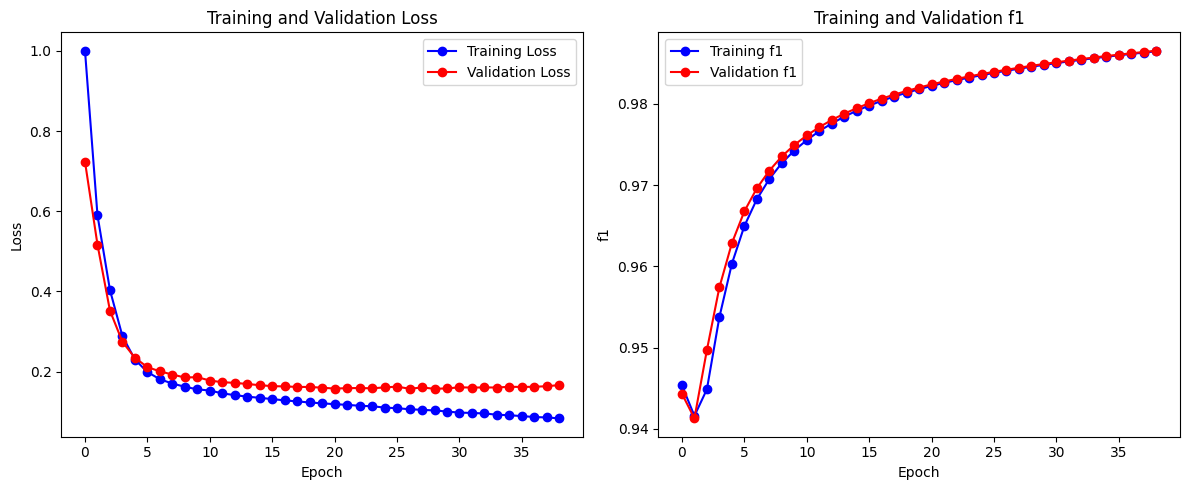

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama metriklerini alın
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['f1_score']
val_acc = history.history['val_f1_score']

# Grafikleri oluşturma
plt.figure(figsize=(12, 5))

# Kayıp (loss) grafiği
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(val_loss, label='Validation Loss', color='red', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk (accuracy) grafiği
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training f1', color='blue', marker='o')
plt.plot(val_acc, label='Validation f1', color='red', marker='o')
plt.title('Training and Validation f1')
plt.xlabel('Epoch')
plt.ylabel('f1')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


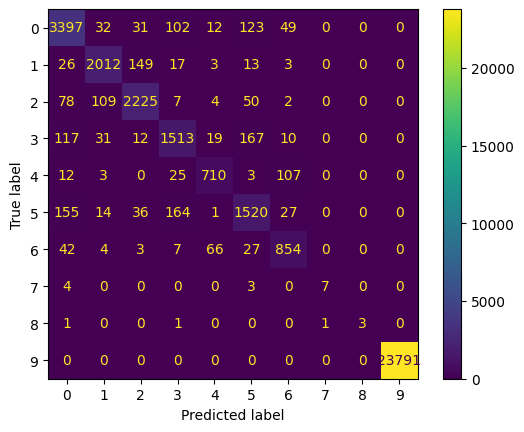

Weighted F1 Score: 0.9506


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

# Assuming model_normal, X_te, and y_te are already defined
# Get predictions
y_pred = model_normal.predict(X_te)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=-1)

# Convert the one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_te, axis=-1)

# Ensure the labels are in the correct shape (1D arrays)
y_pred_labels = y_pred_labels.flatten()
y_true_labels = y_true_labels.flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Show the plot
plt.show()

# Calculate the F1 score
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")


## Multihead Attention Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

# Define Precision and Recall objects
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Define custom F1 Score metric
def f1_score(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    precision_result = precision.result()
    recall_result = recall.result()
    f1 = 2 * ((precision_result * recall_result) / (precision_result + recall_result ))  # Add epsilon to avoid division by zero
    return f1


# Modeli oluşturma
model_input = Input(shape=(X_tr.shape[1],))
embedding_layer = Embedding(input_dim=X.max() + 1, output_dim=128)(model_input)
lstm_layer = LSTM(256, return_sequences=True)(embedding_layer)

# Attention mekanizması ekleme
attention = Attention()
attention_output = attention([lstm_layer, lstm_layer])

dense_layer = Dense(128, activation='relu')(attention_output)
output_layer = Dense(y.shape[2], activation='softmax')(dense_layer)

model15 = Model(inputs=model_input, outputs=output_layer)

# Compile the model with the custom F1 metric
model15.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_score])


# Erken durdurma gerçekleştiricisi
early_stopping = EarlyStopping(monitor='val_f1_score', patience=10, restore_best_weights=True)

# Model training
history = model15.fit(
    X_tr,
    y_tr,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    #callbacks=[early_stopping,mode='max']
)

# If you encounter errors related to 'val_f1_metric' not found, you might need to customize EarlyStopping further.



Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - f1_score: 0.9469 - loss: 1.5329 - val_f1_score: 0.9157 - val_loss: 0.7867
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - f1_score: 0.8958 - loss: 0.7130 - val_f1_score: 0.8704 - val_loss: 0.7301
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - f1_score: 0.8638 - loss: 0.7016 - val_f1_score: 0.8545 - val_loss: 0.7257
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - f1_score: 0.8518 - loss: 0.6957 - val_f1_score: 0.8519 - val_loss: 0.7130
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - f1_score: 0.8523 - loss: 0.6709 - val_f1_score: 0.8547 - val_loss: 0.6768
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - f1_score: 0.8561 - loss: 0.6298 - val_f1_score: 0.8628 - val_loss: 0.5458
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.8670 - loss: 0.4787 - val_f1_score: 0.8769 - val_loss: 0.4397
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - f1_score: 0.8812 - loss: 0.3927 - val_f1_score: 0.

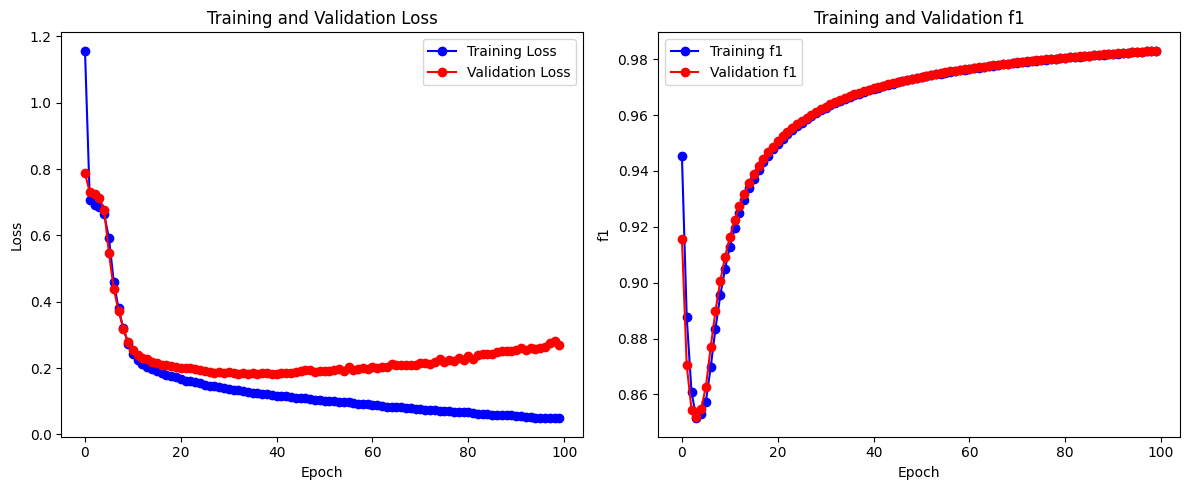

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama metriklerini alın
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['f1_score']
val_acc = history.history['val_f1_score']

# Grafikleri oluşturma
plt.figure(figsize=(12, 5))

# Kayıp (loss) grafiği
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(val_loss, label='Validation Loss', color='red', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk (accuracy) grafiği
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training f1', color='blue', marker='o')
plt.plot(val_acc, label='Validation f1', color='red', marker='o')
plt.title('Training and Validation f1')
plt.xlabel('Epoch')
plt.ylabel('f1')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


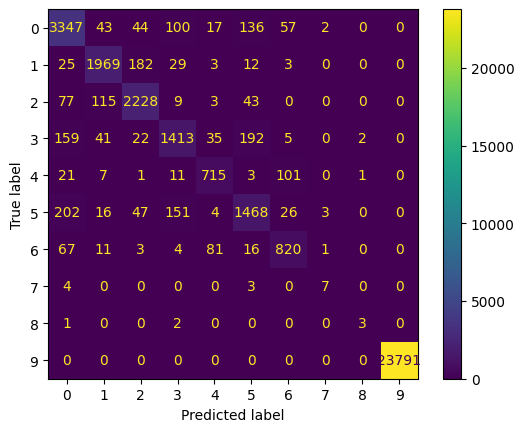

Weighted F1 Score: 0.9432


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

# Assuming model_normal, X_te, and y_te are already defined
# Get predictions
y_pred = model15.predict(X_te)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=-1)

# Convert the one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_te, axis=-1)

# Ensure the labels are in the correct shape (1D arrays)
y_pred_labels = y_pred_labels.flatten()
y_true_labels = y_true_labels.flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Show the plot
plt.show()

# Calculate the F1 score
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")


# Data Augmentation Model

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Noise ekleme fonksiyonu
def add_noise(X, noise_factor=0.1):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=X.shape)
    return X + noise

# Veri augmentasyonu
X_augmented = add_noise(X)
X_combined = np.concatenate([X, X_augmented])
y_combined = np.concatenate([y, y])

# Veriyi böl
X_tr, X_te, y_tr, y_te = train_test_split(X_combined, y_combined, test_size=0.2)

# Model tanımlama
model_input = Input(shape=(X_tr.shape[1],))
embedding_layer = Embedding(input_dim=X.max() + 1, output_dim=128)(model_input)
bilstm_layer = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
output_layer = Dense(y.shape[2], activation='softmax')(bilstm_layer)

model_normal = Model(inputs=model_input, outputs=output_layer)

# F1-score fonksiyonu
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

def f1_score(y_true, y_pred):
    y_true = tf.argmax(y_true, axis=-1)
    y_pred = tf.argmax(y_pred, axis=-1)
    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    precision_result = precision.result()
    recall_result = recall.result()
    f1 = 2 * ((precision_result * recall_result) / (precision_result + recall_result))
    return f1

# Modeli derleme
model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_score])

# Modeli eğitme
history = model_normal.fit(
    X_tr,
    y_tr,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)

# Modeli kaydetme
model_normal.save("model_normal_augmented.h5")


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - f1_score: 0.9214 - loss: 1.0889 - val_f1_score: 0.9196 - val_loss: 0.5507
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - f1_score: 0.9284 - loss: 0.4792 - val_f1_score: 0.9448 - val_loss: 0.2969
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - f1_score: 0.9498 - loss: 0.2775 - val_f1_score: 0.9580 - val_loss: 0.2367
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9604 - loss: 0.2273 - val_f1_score: 0.9649 - val_loss: 0.1995
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9664 - loss: 0.2002 - val_f1_score: 0.9693 - val_loss: 0.1858
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9703 - loss: 0.1803 - val_f1_score: 0.9722 - val_loss: 0.1761
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.9730 - loss: 0.1709 - val_f1_score: 0.9745 - val_loss: 0.1694
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - f1_score: 0.9750 - loss: 0.1606 - val_f1_score: 0.9762 - v

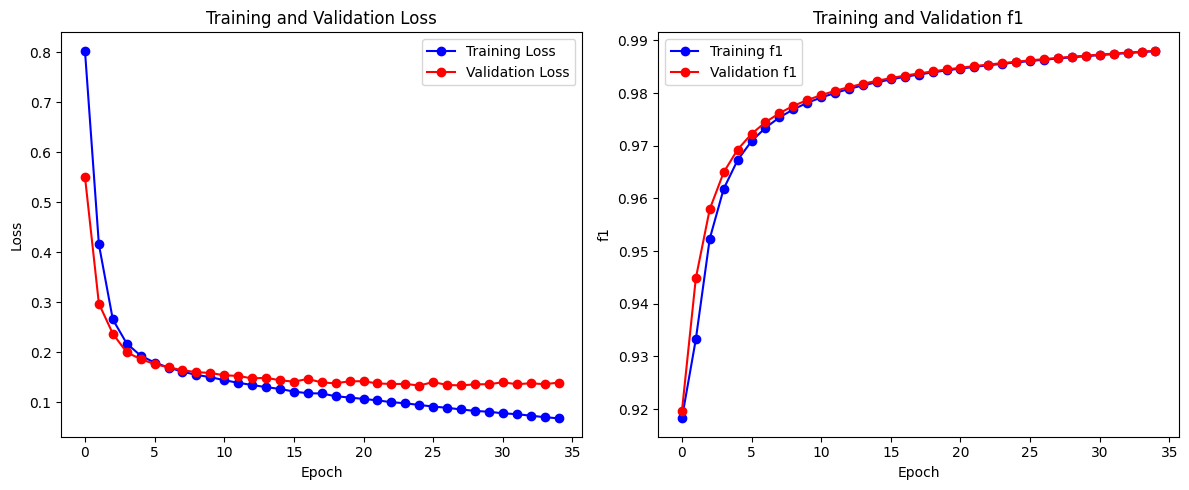

In [39]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama metriklerini alın
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['f1_score']
val_acc = history.history['val_f1_score']

# Grafikleri oluşturma
plt.figure(figsize=(12, 5))

# Kayıp (loss) grafiği
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(val_loss, label='Validation Loss', color='red', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk (accuracy) grafiği
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training f1', color='blue', marker='o')
plt.plot(val_acc, label='Validation f1', color='red', marker='o')
plt.title('Training and Validation f1')
plt.xlabel('Epoch')
plt.ylabel('f1')
plt.legend()

plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


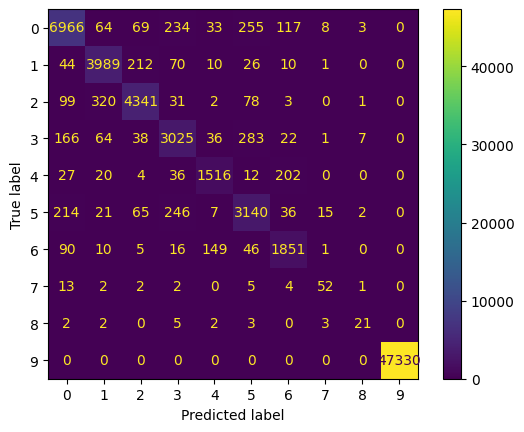

Weighted F1 Score: 0.9529


In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

# Assuming model_normal, X_te, and y_te are already defined
# Get predictions
y_pred = model_normal.predict(X_te)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=-1)

# Convert the one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_te, axis=-1)

# Ensure the labels are in the correct shape (1D arrays)
y_pred_labels = y_pred_labels.flatten()
y_true_labels = y_true_labels.flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Show the plot
plt.show()

# Calculate the F1 score
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")
